In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("adad.jpg")

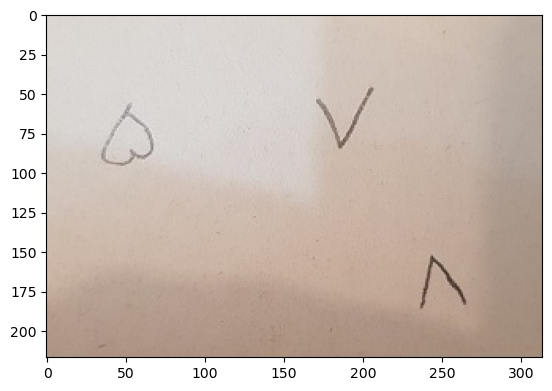

In [3]:
plt.imshow(img[...,::-1])

In [4]:
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [5]:
noise_removed = cv2.medianBlur(img_grey,5)

In [6]:
th2 = cv2.adaptiveThreshold(noise_removed,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)

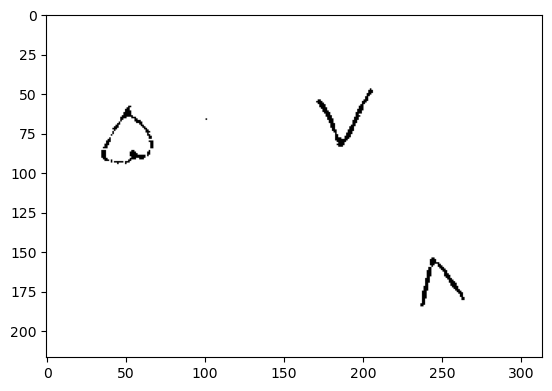

In [7]:
plt.imshow(th2,'gray')

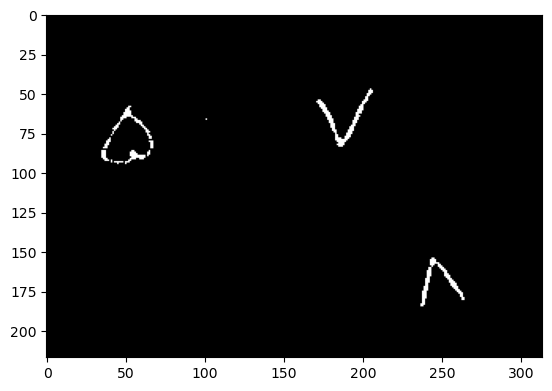

In [8]:
fimg = np.invert(th2)
plt.imshow(fimg, cmap = 'gray')

In [9]:
SE = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
SE

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [31]:
SE2 = np.array([[0,0,0,1,1],[0,0,1,1,1],[0,1,1,1,0],[1,1,1,0,0],[1,1,0,0,0]], dtype = np.uint8)
SE2

array([[0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0]], dtype=uint8)

In [73]:
SE3 =  np.array([[1,1,0,0,0,1,1],[0,1,1,0,1,1,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,1,1,0,1,1,0],[1,1,0,0,0,1,1]], dtype = np.uint8)
SE3

array([[1, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 1]], dtype=uint8)

In [78]:
output = cv2.morphologyEx(fimg,cv2.MORPH_CLOSE,SE2)

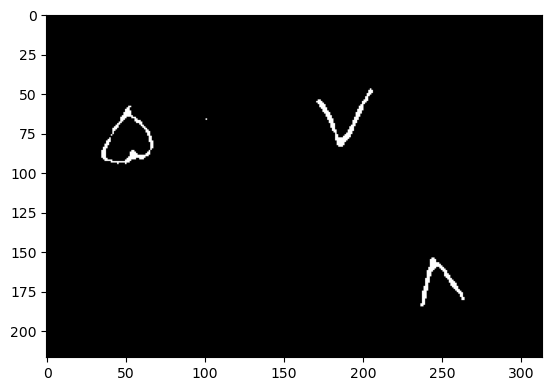

In [79]:
plt.imshow(output, cmap='gray')

In [80]:
num_labels, labels = cv2.connectedComponents(output, 8)

In [81]:
num_labels

5

In [82]:
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(output) * 255
labeled_image = cv2.merge([label_hue, blank, blank])

In [83]:
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2RGB)

In [84]:
labeled_image[label_hue==0] = 0

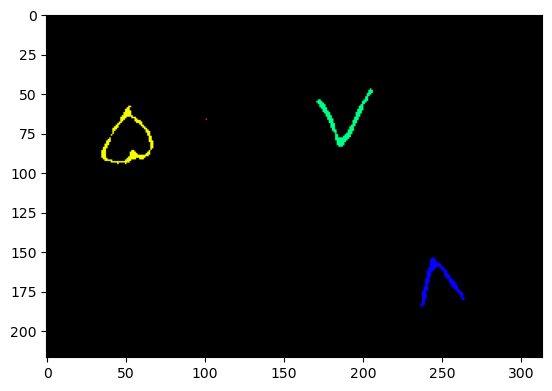

In [85]:
plt.imshow(labeled_image[...,::-1])